# Breast Cancer Prediction

## Dataset:
## Breast Cancer dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
## Goal: To predict whether the cell is cancerous or not

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [3]:
# load data and per process
df = pd.read_csv("./input/breast_cancer.csv",header = 0)
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.drop('id',axis=1,inplace=True)
#df.drop('Unnamed: 32',axis=1,inplace=True)

# train test split
df_train = df.loc[:400, ['diagnosis', 'radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']]
df_test = df.loc[400:, ['diagnosis', 'radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']]

df_train

diagnosis  radius_mean  perimeter_mean  area_mean  compactness_mean  \
0            1        17.99          122.80     1001.0           0.27760   
1            1        20.57          132.90     1326.0           0.07864   
2            1        19.69          130.00     1203.0           0.15990   
3            1        11.42           77.58      386.1           0.28390   
4            1        20.29          135.10     1297.0           0.13280   
..         ...          ...             ...        ...               ...   
396          0        13.51           88.10      558.1           0.11470   
397          0        12.80           83.05      508.3           0.08895   
398          0        11.06           70.31      378.2           0.04768   
399          0        11.80           75.26      431.9           0.06232   
400          1        17.91          124.40      994.0           0.25760   

     concave points_mean  
0               0.147100  
1               0.070170  
2               0.127900  
3               0.105200  
4               0.104300  
..                   ...  
396             0.053810  
397             0.040830  
398             0.007246  
399             0.016380  
400             0.119800  

[401 rows x 6 columns]

## Model training

In [4]:
X, y = df_train.iloc[:, 1:], df_train.diagnosis
X_test, y_test = df_test.iloc[:, 1:], df_test.diagnosis

In [5]:
# Train model
model = DecisionTreeClassifier()
model.fit(X, y)
acc = metrics.accuracy_score(y_test, model.predict(X_test))
print('test accuracy =', acc)

test accuracy = 0.8875739644970414


# Partial Dependence Plot (PDP)

The partial dependence plot (short PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model (J. H. Friedman 200130). A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic or more complex.

For a dataset with size $N$: $\bf{x} ^{(1)}, \ldots, \bf{x} ^{(N)}$, the partial dependence function for the selected feature $x_d$ is calculated as

$$ \hat{f}_d(x_d) = \frac{1}{N} \sum^N_{i=1} f(x_d, \bf{x}^{(i)}_{ \backslash d}) $$

Where the function $f(\cdot)$ is the trained machine learning model of interest to interpret, and $x^{(i)}_{ \backslash d}$ denotes all other features in $\bf{x}$ except the feature $x_d$.

Then the parital dependence plot is just the plot for the partial dependence function.

In [6]:
def pdp(model, X_train, feature_col):
    # function to plot partial dependence plot for the given model, and a specified feature of interest
    m = len(X_train)
    
    pdp_x = np.zeros(m)
    pdp_y = np.zeros(m)
    for i in range(m):
        X_new = X_train.copy()
        X_new[feature_col] = X_train[feature_col].iloc[i]
        
        pdp_x[i] = X_train[feature_col].iloc[i]
        pdp_y[i] = model.predict(X_new).mean()
    
    plt.plot(pdp_x, pdp_y, 'b.')
    plt.xlabel(feature_col)
    plt.ylabel('average model prediction')

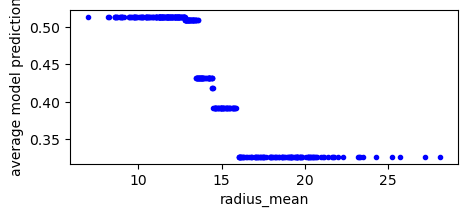

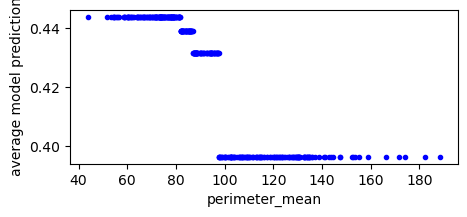

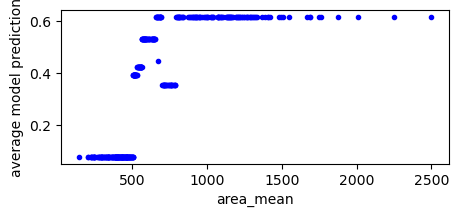

In [7]:
for col in X.columns:
    plt.figure(figsize=(5, 2))
    pdp(model, X, col)


### Advantage:
 1. Computation of partial dependence plot is intuitive and easy to understand
 2. Easy to implement

### Disadvantage:
 1. assumption of independence between features which does not usually hold
 2. interaction between features might be hidden

# Global surrogates

Perform the following steps to obtain a global surrogate model:

1. Select a dataset X. This can be the same dataset that was used for training the black box model or a new dataset from the same distribution. You could even select a subset of the data or a grid of points, depending on your application.
2. For the selected dataset X, get the predictions of the black box model.
3. Select an interpretable model type (linear model, decision tree, …).
4. Train the interpretable model on the dataset X and its predictions.
5. Congratulations! You now have a surrogate model.
6. Measure how well the surrogate model replicates the predictions of the black box model.
7. Interpret the surrogate model.

### Advantage:
  1. High flexibility, there is no limitation as to what surrogate model to used. The only requirement is that the surrogate model is easy to interpret for the people of concern.
  2. Method intuitive to understand.

### Disadvantage:
  1. draw conclusions about the model and not about the data
  2. It could happen that the interpretable model is very close for one subset of the dataset, but widely divergent for another subset

# Local surrogates
## Local interpretablle model-agnostic explanatioms (LIME)

The recipe for training local surrogate models:

1. Select your instance of interest for which you want to have an explanation of its black box prediction.
2. Perturb your dataset and get the black box predictions for these new points.
3. Weight the new samples according to their proximity to the instance of interest.
4. Train a weighted, interpretable model on the dataset with the variations.
5. Explain the prediction by interpreting the local model.

### Advantage:
1. Even if you replace the underlying machine learning model, you can still use the same local, interpretable model for explanation.
2. LIME is one of the few methods that works for tabular data, text and images.
### disadvantage
1. The definition of small perturbation in training the surrogate model is data-dependent and is difficult to select
2. Sampling could be improved in the current implementation of LIME. Data points are sampled from a Gaussian distribution, ignoring the correlation between features. This can lead to unlikely data points which can then be used to learn local explanation models.

# Reference

Reference book: <b>Interpretable Machine Learning</b> - https://christophmolnar.com/books/interpretable-machine-learning/